Linear Regression


In [1]:
import numpy as np

In [2]:
# let's start with taking 2 arrays x and y
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

In [3]:
h = np.ones((100,1))
X_b = np.c_[h,X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.47107863],
       [2.98417057]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [5]:
y_predict

array([[ 4.47107863],
       [10.43941978]])

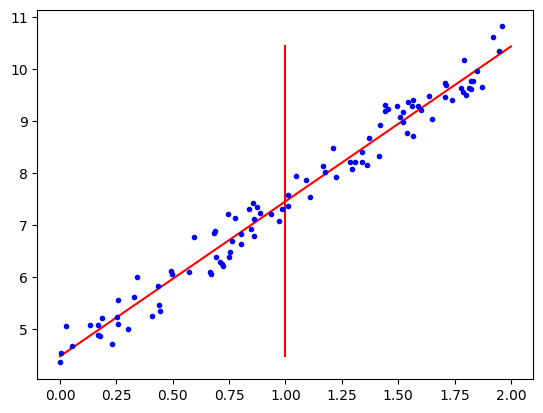

In [6]:
import matplotlib.pyplot as plt
plt.plot(X_new_b,y_predict,"r-")
plt.plot(X,y,".b")
plt.show()

Using Sci-kit learn

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[ 4.47107863],
       [10.43941978]])

In [8]:
lin_reg.intercept_

array([4.47107863])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [10]:
theta_best_svd

array([[4.47107863],
       [2.98417057]])

Using Batch Gradient Descent

In [11]:
# eta is the learning rate,m is size of sample
eta = 0.1
m = 100
n_iterations = 1000
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
theta

array([[4.47107863],
       [2.98417057]])

In [12]:
# this is perfect  

Using stockastic gradient descent

In [14]:
n_epochs = 50
t0,t1 = 5,50
#a function that define the learning rate is called learning schedule
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
for epoch in  range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi =  X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradients
theta


array([[4.47556139],
       [2.99178079]])

SGDregressor with sklearn

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.45109659]), array([2.98061459]))